In [1]:
# Import libraries
import torch
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
%matplotlib inline

# PyTorch dataset
from torchvision import io
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# sklear
from sklearn.preprocessing import MinMaxScaler

# PyTorch model
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
image = io.read_image('data/tiger.jpg')
image = transforms.Resize(150)(image)

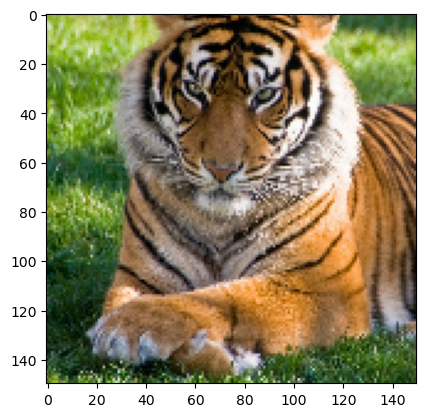

In [5]:
imgPlt = np.transpose(image, (1, 2, 0))
plt.imshow(imgPlt)

In [6]:
imgPlt.shape

torch.Size([150, 150, 3])

In [7]:
# We are going to apply the kernel in every channel
kernel=np.asarray([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

channels = image.shape[0]
height = image.shape[1]
width = image.shape[2]
print(channels, height, width)

                   

3 150 150


In [28]:
def getFrequency(HPFilter: npt.NDArray, region: npt.NDArray):
    features = np.multiply(kernel, region)
    # print(region)
    # print(features)
    return features.sum()
    pass

def applyKernel(HPFilter: npt.NDArray, image: any) -> npt.NDArray:
    channels = image.shape[0]
    height = image.shape[1]
    width = image.shape[2]
    normalizeImage = image / 255
    newImage = np.zeros_like(normalizeImage)

    for c in range(channels):
        for h in range(1, height-1):
            for w in range(1, width-1):
                region = normalizeImage[c, h-1 : h+2, w-1 : w+2]
                newImage[c, h, w] = getFrequency(kernel, region)
    # newImage = (newImage - newImage.min()) / (newImage.max() - newImage.min())
    # newImage *= 255
    # newImage = newImage.astype(int)
    return newImage

In [29]:
# normalizeImage = image / 255
# newImage = np.zeros_like(normalizeImage)

# # c=0
# # h=1
# # w=1
# # region = normalizeImage[c, h-1 : h+2, w-1 : w+2]
# # print(region.shape)
# # print(region)

# # frequency = getFrequency(kernel, region)
# # print(frequency)
# for c in range(channels):
#     for h in range(1, height-1):
#         for w in range(1, width-1):
#             region = normalizeImage[c, h-1 : h+2, w-1 : w+2]
#             newImage[c, h, w] = getFrequency(kernel, region)

# newImage = (newImage - newImage.min()) / (newImage.max() - newImage.min())
# newImage *= 255
# newImage = newImage.astype(int)
kernel=np.asarray([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])
newImage = applyKernel(kernel, image)

In [30]:

grayOnly = newImage[0, :, :]
print(grayOnly.max())

print(newImage.max())

2.9411764
2.9411764


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


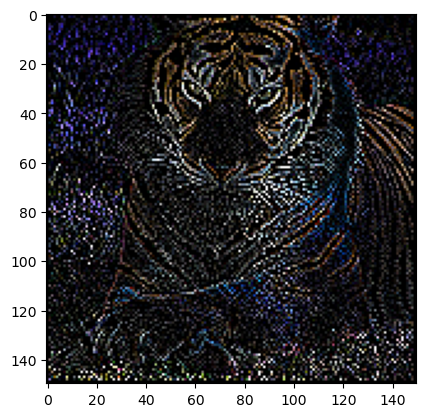

In [31]:
plt.imshow(np.transpose(newImage, (1, 2, 0)))

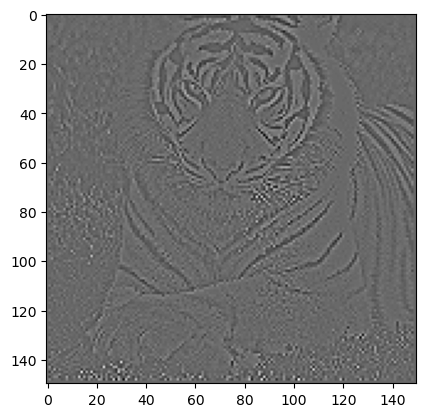

In [32]:

plt.imshow(grayOnly, cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


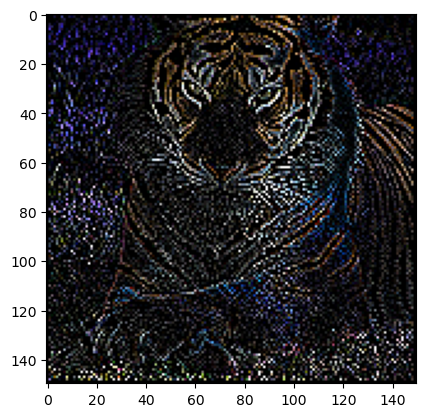

In [35]:
# kernel horizontal edges
horKernel = np.asarray([
    [-1, -1, -1],
    [2, 2, 2],
    [-1, -1, -1]
])
horKernel = np.asarray([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])
newImage = applyKernel(horKernel, image)
plt.imshow(np.transpose(newImage, (1, 2, 0)))

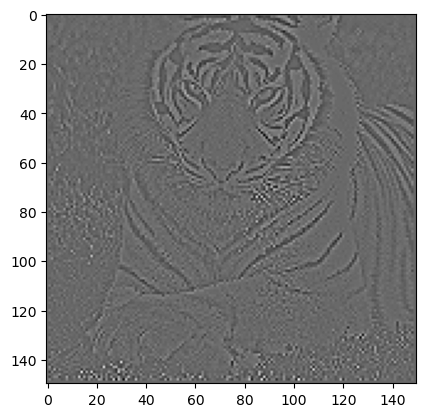

In [36]:
grayOnly = newImage[0, :, :]
plt.imshow(grayOnly, cmap="gray")